In [22]:
%matplotlib inline
%env CUDA_VISIBLE_DEVICES=1

env: CUDA_VISIBLE_DEVICES=1


In [23]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
import tensorflow as tf
import math

# Acoustic Array Geometry

In [24]:
geometry = pd.read_csv('../AA_geometry.tsv', header=None, sep='\t')
AA_Geometry = geometry.to_numpy().transpose()
#x = arrayGeometry[0]
#y = arrayGeometry[1]
#z = arrayGeometry[2]

# AA Geometry Top View

Text(0, 0.5, 'Y-axis')

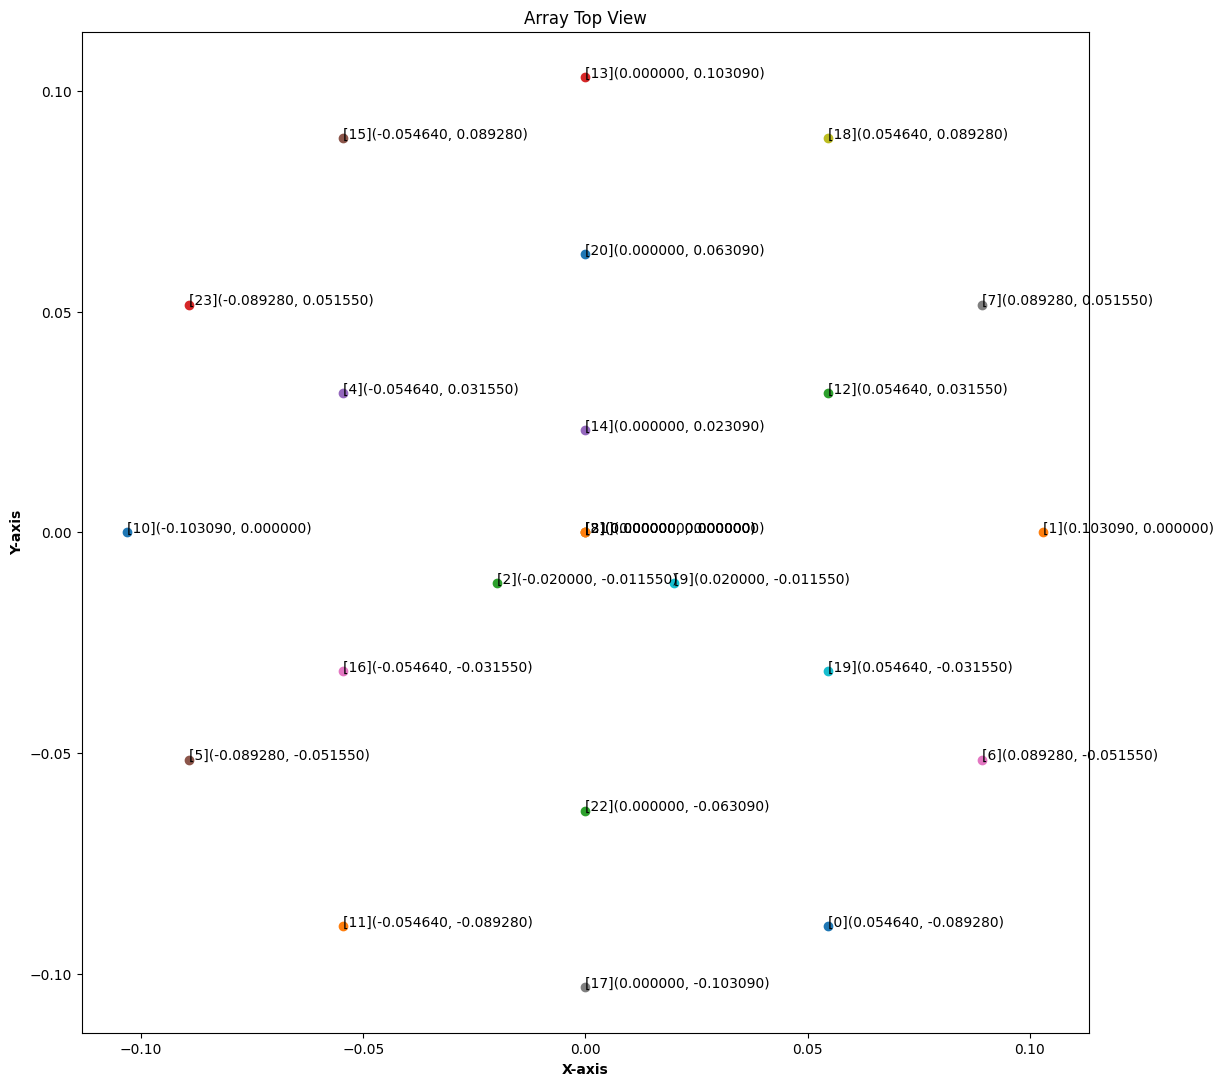

In [25]:
fig = plt.figure(figsize = (13,13))
ax = plt.axes()
for i in range(AA_Geometry.shape[1]):
    ax.scatter(AA_Geometry[0][i],AA_Geometry[1][i])
    ax.text(AA_Geometry[0][i], AA_Geometry[1][i], '[%s](%f, %f)'%(str(i), AA_Geometry[0][i], AA_Geometry[1][i]))
plt.title("Array Top View")
ax.set_xlabel('X-axis', fontweight ='bold') 
ax.set_ylabel('Y-axis', fontweight ='bold') 

# AA Geometry 3D View

Text(0.5, 0, 'Z-axis')

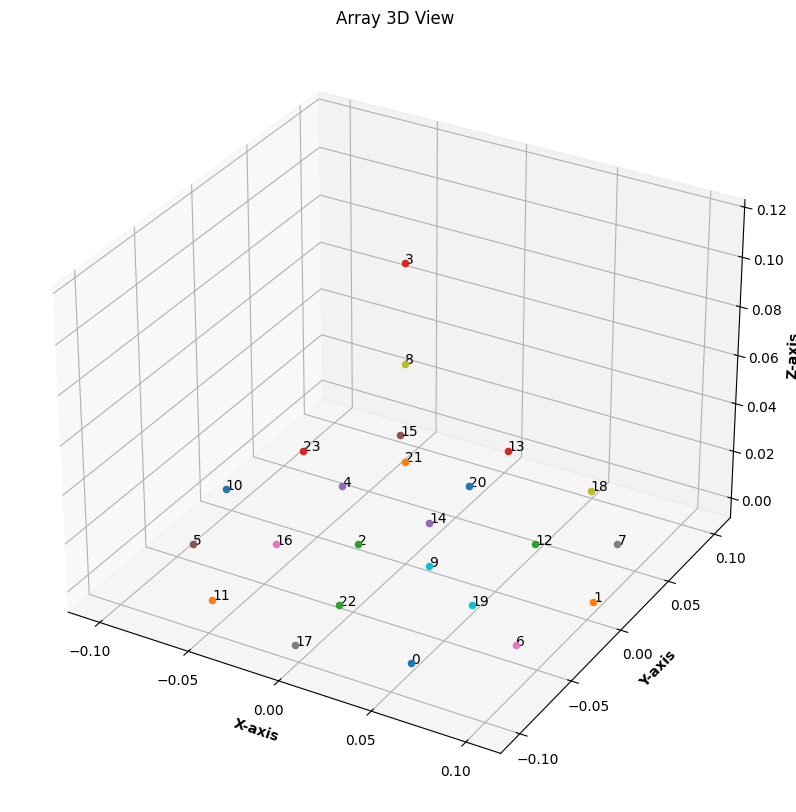

In [26]:
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection = "3d")
for i in range(AA_Geometry.shape[1]):
    ax.scatter(AA_Geometry[0][i],AA_Geometry[1][i],AA_Geometry[2][i])
    ax.text(AA_Geometry[0][i],AA_Geometry[1][i],AA_Geometry[2][i], '%s'%(str(i)))
plt.title("Array 3D View")
ax.set_xlabel('X-axis', fontweight ='bold') 
ax.set_ylabel('Y-axis', fontweight ='bold') 
ax.set_zlabel('Z-axis', fontweight ='bold')

# Extract Data

In [27]:
def key(x):
    return(x[26])

In [28]:
path_dir = "../data/rss180/"
n_channels = 24

In [29]:
# Time delay files
files_tau = [i for i in os.listdir(path_dir) if os.path.isfile(os.path.join(path_dir,i)) and \
         'tau.bin' in i]
files_tau = sorted(files_tau, key = key)   
files_tau

['random_signal_source_info_0_tau.bin',
 'random_signal_source_info_1_tau.bin',
 'random_signal_source_info_2_tau.bin',
 'random_signal_source_info_3_tau.bin',
 'random_signal_source_info_4_tau.bin',
 'random_signal_source_info_5_tau.bin',
 'random_signal_source_info_6_tau.bin',
 'random_signal_source_info_7_tau.bin',
 'random_signal_source_info_8_tau.bin',
 'random_signal_source_info_9_tau.bin']

In [30]:
# Extract Time delay
taus = []
for file in files_tau:
    with open(path_dir+file, 'rb') as f:
        delay = f.read()
        delay = np.frombuffer(delay, dtype = np.float32)
        delay = np.resize(delay, (int(len(delay)/n_channels), n_channels))
        taus.append(delay)
taus_np = np.array(taus)
taus_np = taus_np.reshape(taus_np.shape[0]*taus_np.shape[1], taus_np.shape[2])

In [31]:
# Source signal information files
files_dat = [i for i in os.listdir(path_dir) if os.path.isfile(os.path.join(path_dir,i)) and \
         '.dat' in i]
files_dat = sorted(files_dat, key = key)   
files_dat

['random_signal_source_info_0.dat',
 'random_signal_source_info_1.dat',
 'random_signal_source_info_2.dat',
 'random_signal_source_info_3.dat',
 'random_signal_source_info_4.dat',
 'random_signal_source_info_5.dat',
 'random_signal_source_info_6.dat',
 'random_signal_source_info_7.dat',
 'random_signal_source_info_8.dat',
 'random_signal_source_info_9.dat']

In [32]:
# Extract signal information
dats = []
for file in files_dat:
    with open(path_dir+file, 'r') as f:
        lines = f.readlines()
        for i,l in enumerate(lines):
            if (i>0):
                dat = [float(i) for i in l.split()]
                dats.append(dat)
dats_np = np.array(dats)
dats_np

array([[4.800e+04, 3.430e+02, 7.910e+01, 0.000e+00],
       [4.800e+04, 3.430e+02, 1.741e+02, 0.000e+00],
       [4.800e+04, 3.430e+02, 2.110e+01, 0.000e+00],
       ...,
       [4.800e+04, 3.430e+02, 1.623e+02, 0.000e+00],
       [4.800e+04, 3.430e+02, 2.770e+01, 0.000e+00],
       [4.800e+04, 3.430e+02, 1.177e+02, 0.000e+00]])

In [33]:
# Input/Output data
X_data = taus_np
Y_data = dats_np[:,2]

Text(0, 0.5, 'Y-axis')

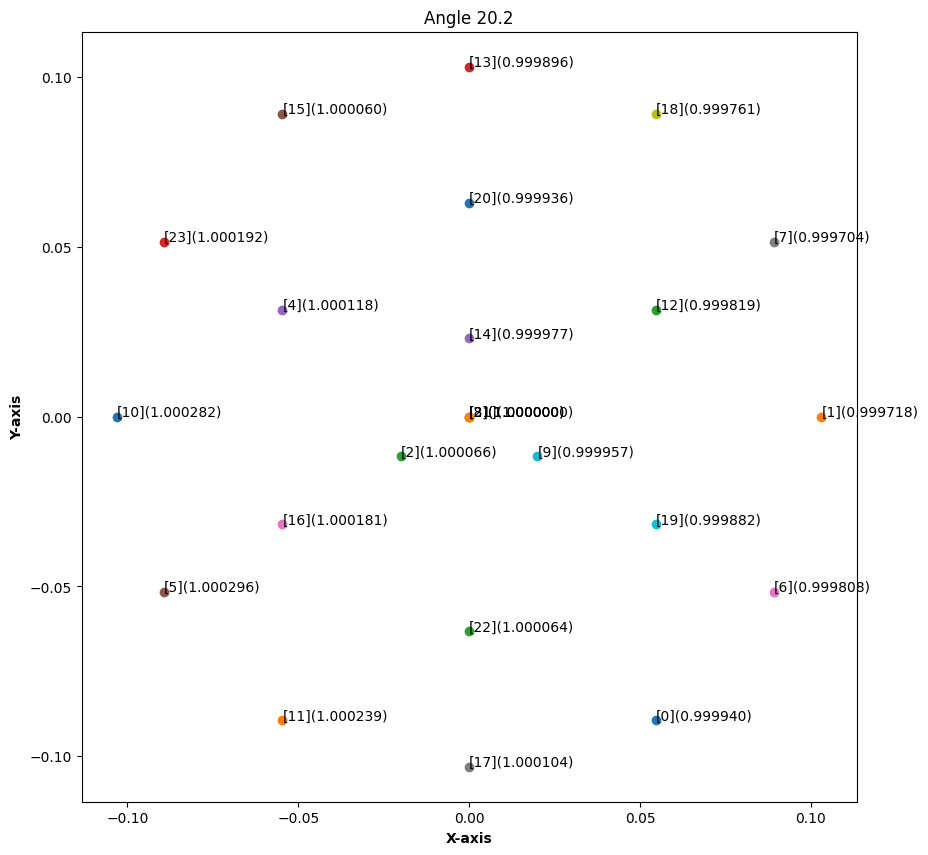

In [34]:
# Test
fig = plt.figure(figsize = (10,10))
ax = plt.axes()
angle_id = 8
for i in range(AA_Geometry.shape[1]):
    ax.scatter(AA_Geometry[0][i],AA_Geometry[1][i])
    ax.text(AA_Geometry[0][i],AA_Geometry[1][i], '[%s](%f)'%(str(i), X_data[angle_id,i]))
plt.title("Angle %s"%(str(Y_data[angle_id])))
ax.set_xlabel('X-axis', fontweight ='bold') 
ax.set_ylabel('Y-axis', fontweight ='bold') 

In [35]:
# Estimating the data correctness
for i in range(n_channels):
    t = math.sqrt((AA_Geometry[0][7] - AA_Geometry[0][i])**2 + (AA_Geometry[1][7]-AA_Geometry[1][i])**2) / 343
    print( '[%s] '%(str(i)), t, X_data[1,i])
    print("Diff: ", t-X_data[1,i])

[0]  0.0004228211293417438 1.0001853
Diff:  -0.9997624
[1]  0.0001555911586754117 1.000299
Diff:  -1.0001434
[2]  0.0003678987063499147 0.99994546
Diff:  -0.9995776
[3]  0.00030056486330339515 1.0
Diff:  -0.9996994
[4]  0.0004236239527639102 0.9998321
Diff:  -0.9994085
[5]  0.0006011297266067903 0.9997565
Diff:  -0.9991554
[6]  0.00030058309037900874 1.0002744
Diff:  -0.99997383
[7]  0.0 1.0002434
Diff:  -1.0002434
[8]  0.00030056486330339515 1.0
Diff:  -0.9996994
[9]  0.0002732033305781843 1.0000615
Diff:  -0.9997883
[10]  0.0005806334490615953 0.999701
Diff:  -0.9991204
[11]  0.0005870568827290685 0.9998683
Diff:  -0.9992812
[12]  0.00011661551017585942 1.000149
Diff:  -1.0000324
[13]  0.0003005502862204093 0.9999691
Diff:  -0.9996686
[14]  0.00027319651077657866 0.9999931
Diff:  -0.9997199
[15]  0.00043377103344321413 0.9998148
Diff:  -0.99938107
[16]  0.00048451421646693885 0.999851
Diff:  -0.99936646
[17]  0.0005205894123778848 1.0000309
Diff:  -0.9995103
[18]  0.00014932927814949

Text(0, 0.5, 'Time Delay (ms)')

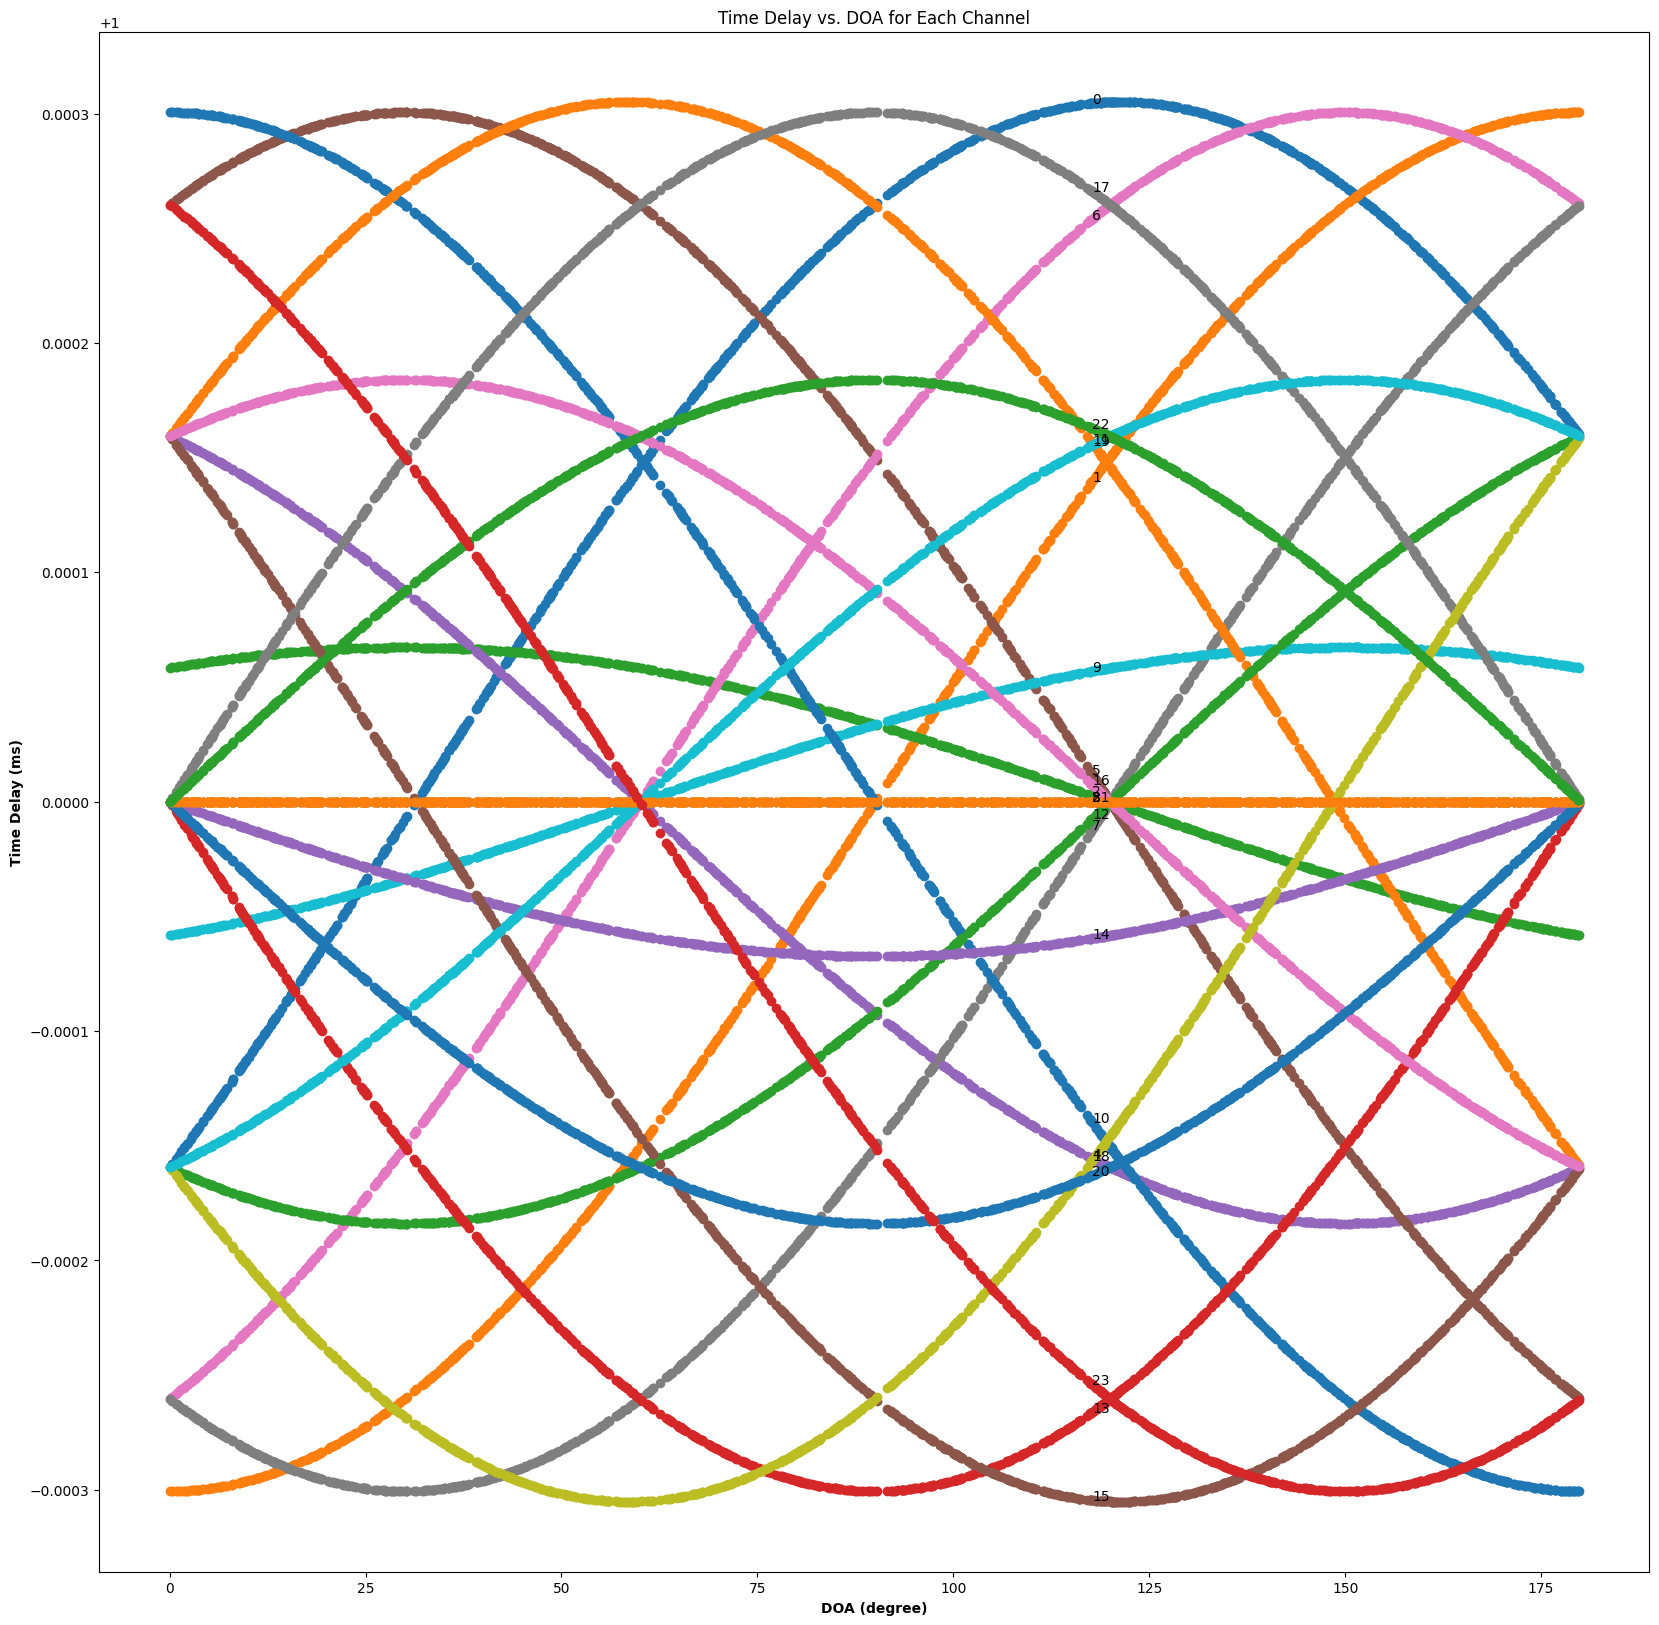

In [36]:
# Time delay vs angle at different channel
fig = plt.figure(figsize = (20,20))
ax = plt.axes()
for i in range(n_channels):
    ax.scatter(Y_data, X_data[:,i])
    ax.text(Y_data[-1], X_data[-1,i], '%s'%(str(i)))
plt.title("Time Delay vs. DOA for Each Channel")
ax.set_xlabel('DOA (degree)', fontweight ='bold') 
ax.set_ylabel('Time Delay (ms)', fontweight ='bold') 

In [54]:
# Train/Test spilt
indices = np.random.permutation(X_data.shape[0])
train_id, test_id = indices[:int(X_data.shape[0]*0.80)], indices[int(X_data.shape[0]*0.80):]
x_train, y_train, x_test, y_test = X_data[train_id,:], Y_data[train_id], X_data[test_id,:], Y_data[test_id]
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((800, 24), (800,), (200, 24), (200,))

In [55]:
x_train[:10]

array([[0.99995875, 0.9997248 , 1.0000669 , 1.        , 1.0001088 ,
        1.0002987 , 0.9998221 , 0.99970126, 1.        , 0.9999601 ,
        1.0002753 , 1.0002505 , 0.99981713, 0.9998792 , 0.99997294,
        1.0000412 , 1.0001829 , 1.0001208 , 0.9997495 , 0.9998911 ,
        0.9999261 , 1.        , 1.0000739 , 1.000178  ],
       [1.000279  , 1.0002474 , 0.99997115, 1.        , 0.99981666,
        0.9998711 , 1.0002996 , 1.0001289 , 1.        , 1.0000671 ,
        0.9997526 , 1.0000167 , 1.0000789 , 0.99982935, 0.9999618 ,
        0.99972105, 0.9999211 , 1.0001707 , 0.9999833 , 1.0001833 ,
        0.9998956 , 1.        , 1.0001044 , 0.9997004 ],
       [1.0002127 , 1.0002933 , 0.9999505 , 1.        , 0.9998244 ,
        0.9997791 , 1.0002869 , 1.0002209 , 1.        , 1.0000643 ,
        0.9997068 , 0.99990183, 1.0001352 , 0.9999339 , 0.9999852 ,
        0.9997874 , 0.9998648 , 1.000066  , 1.0000982 , 1.0001756 ,
        0.9999596 , 1.        , 1.0000404 , 0.99971306],
       [0.999

In [53]:
# Pre scaling the Input
max_norm = np.max(np.max((x_train)))
x_train *= pre_scale
x_test *= pre_scale
max_norm

np.float32(1.0003052)

In [38]:
# Pre scaling the Input
pre_scale = 10000
x_train *= pre_scale
x_test *= pre_scale

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


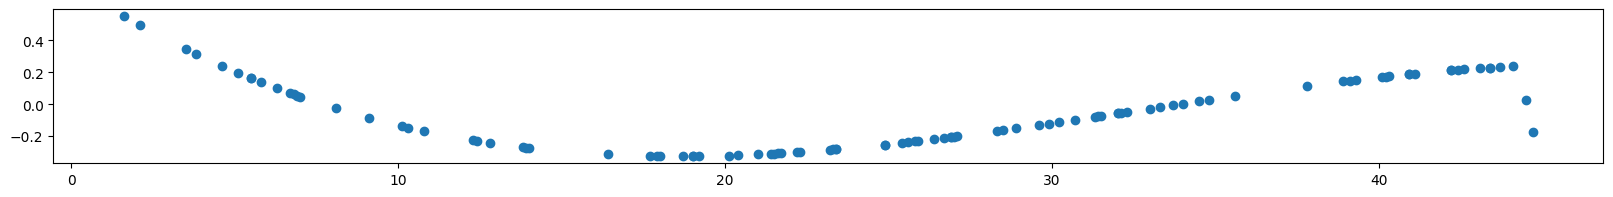

In [440]:
fig = plt.figure(figsize = (20,2))
ax = plt.axes()
#for i in range(len(channel_id)):
ax.scatter(y_test_4, model4.predict(x_test_4).flatten() - y_test_4)
    #ax.scatter(y_test_4, x_test_4[:,i])
    #ax.scatter(model4.predict(x_test_4), x_test_4[:,i])



# Test

In [39]:
# Train/Test with 2 channel
channel_id = [1,7,18,13] 
x_train_4 = x_train[:, channel_id]
y_train_4 = y_train
x_test_4 = x_test[:, channel_id]
y_test_4 = y_test

x_train_4.shape

(800, 4)

In [40]:
x_train_4 = x_train_4 - x_train_4[:,[0]]
x_test_4 = x_test_4 - x_test_4[:,[0]]
x_train_4[:10]

array([[ 0.        , -0.20605469,  0.30273438,  1.6191406 ],
       [ 0.        , -1.3876953 , -2.881836  , -4.245117  ],
       [ 0.        , -1.4326172 , -2.9208984 , -4.2197266 ],
       [ 0.        , -0.5966797 , -0.46484375,  0.55371094],
       [ 0.        , -0.6845703 , -1.8867188 , -3.5283203 ],
       [ 0.        , -1.1572266 , -2.6044922 , -4.1591797 ],
       [ 0.        , -1.0205078 , -1.3681641 , -0.8105469 ],
       [ 0.        , -0.5703125 , -0.41308594,  0.62890625],
       [ 0.        , -1.0361328 , -2.4345703 , -4.038086  ],
       [ 0.        , -1.4355469 , -2.3876953 , -2.5703125 ]],
      dtype=float32)

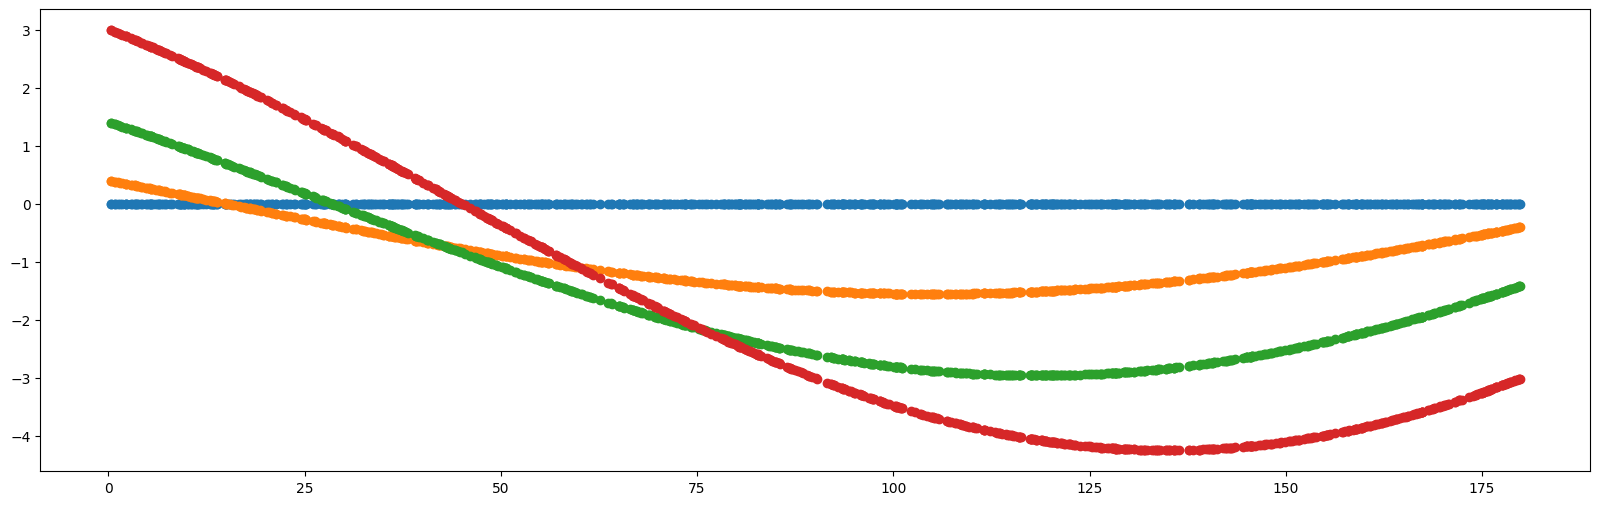

In [41]:
fig = plt.figure(figsize = (20,6))
ax = plt.axes()
for i in range(len(channel_id)):
    ax.scatter(y_train_4, x_train_4[:,i])

In [42]:
model4 = tf.keras.Sequential([
    tf.keras.layers.Input(x_train_4[0].shape),
    tf.keras.layers.Normalization(),
    tf.keras.layers.Dense(units=16, activation='relu'),
    tf.keras.layers.Dense(units=8, activation='relu'),
    tf.keras.layers.Dense(units=1, activation = 'linear')
])
model4.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225 (900.00 B)

 Trainable params: 225 (900.00 B)

 Non-trainable params: 0 (0.00 B)

In [43]:
model4.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [44]:
losses = model4.fit(x_train_4, y_train_4,
                   batch_size=8,
                   epochs=200)

Epoch 1/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 10950.7275 - mae: 88.9095  
Epoch 2/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 869us/step - loss: 10250.5566 - mae: 86.8058
Epoch 3/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 861us/step - loss: 7953.0391 - mae: 74.3593
Epoch 4/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 814us/step - loss: 5179.3643 - mae: 58.7623
Epoch 5/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step - loss: 1503.4431 - mae: 23.4923
Epoch 6/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 846us/step - loss: 1076.1866 - mae: 23.7699
Epoch 7/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 844us/step - loss: 1145.4563 - mae: 24.9402
Epoch 8/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 927us/step - loss: 1007.1989 - mae: 22.8483
Epoch 9/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 914us/step - loss: 1054.2059 - mae: 23.5875
Epoch 10/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 877us/step - loss: 874.3216 - mae: 21.8250
Epoch 11/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 899us/step - loss: 875.9384 - mae: 21.3854
Epoch 12/200
100/100 ━━━━━━━━━

In [45]:
model4.predict(x_test_4), y_test_4

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


(array([[ 18.407051  ],
        [ 37.05319   ],
        [112.25946   ],
        [ 86.38109   ],
        [ 26.491642  ],
        [147.56656   ],
        [ 79.71371   ],
        [145.10292   ],
        [ 45.62709   ],
        [ 71.03302   ],
        [ 85.13068   ],
        [ 86.10209   ],
        [118.55685   ],
        [161.24513   ],
        [125.520996  ],
        [ 48.47281   ],
        [ 34.939064  ],
        [ 18.637535  ],
        [171.07387   ],
        [126.92831   ],
        [ 39.888107  ],
        [ 12.201886  ],
        [137.58989   ],
        [ 15.28025   ],
        [151.38051   ],
        [100.103836  ],
        [  6.796323  ],
        [ 78.00331   ],
        [ 46.05526   ],
        [ 57.496635  ],
        [ 81.02783   ],
        [106.38185   ],
        [ 89.18649   ],
        [ 94.30294   ],
        [110.22852   ],
        [ 22.073896  ],
        [ 85.60757   ],
        [102.808044  ],
        [ 65.28291   ],
        [152.25456   ],
        [139.01146   ],
        [165.231

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


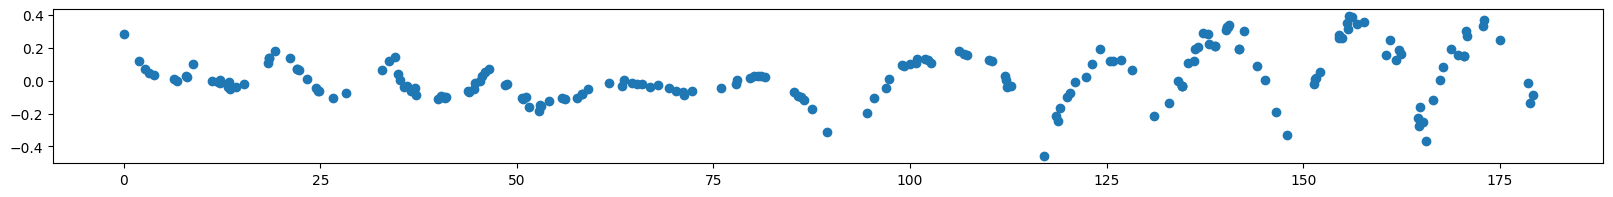

In [46]:
fig = plt.figure(figsize = (20,2))
ax = plt.axes()
#for i in range(len(channel_id)):
ax.scatter(y_test_4, model4.predict(x_test_4).flatten() - y_test_4)
    #ax.scatter(y_test_4, x_test_4[:,i])
    #ax.scatter(model4.predict(x_test_4), x_test_4[:,i])



7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


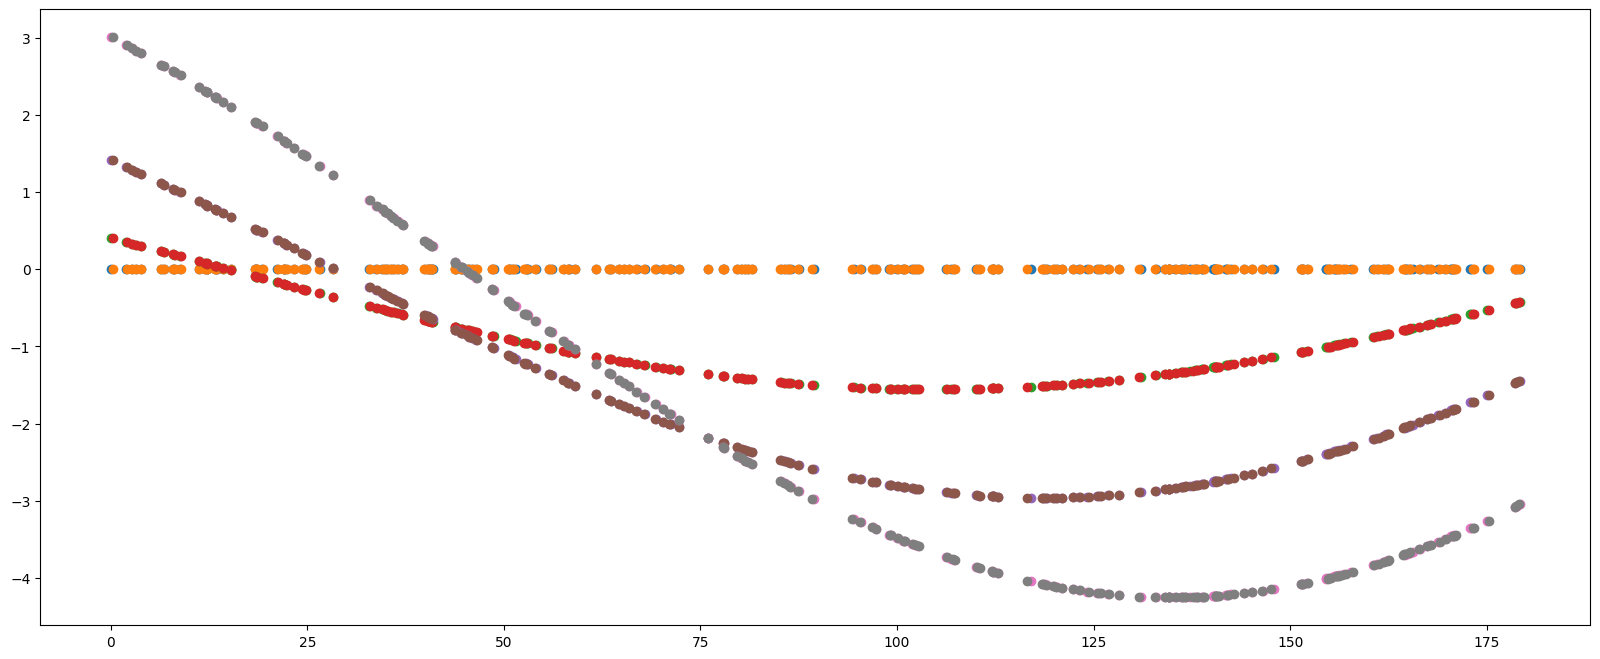

In [47]:
fig = plt.figure(figsize = (20,8))
ax = plt.axes()
for i in range(len(channel_id)):
    ax.scatter(y_test_4, x_test_4[:,i])
    ax.scatter(model4.predict(x_test_4), x_test_4[:,i])



In [424]:
model4.predict(x_test_4).flatten() - y_test_4

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


array([-0.07916908,  0.04246902,  0.04635391,  0.01985512, -0.06350784,
       -0.06386681,  0.04087372,  0.03911171,  0.00452957, -0.08978806,
        0.05349555, -0.06362076, -0.17527695, -0.03437424, -0.05744705,
        0.12552605,  0.04577255, -0.06071625,  0.03829651,  0.01828232,
       -0.11944809,  0.0139801 ,  0.1195652 ,  0.02531815, -0.03322563,
        0.0643856 , -0.03207703,  0.01193848,  0.00452957,  0.02443466,
        0.00123444, -0.03701553,  0.0446785 ,  0.03672028,  0.13156319,
        0.0226429 , -0.07330589, -0.06103897, -0.04989204, -0.0355114 ,
       -0.06854248,  0.04634781, -0.17062912, -0.07083549, -0.09330673,
        0.01498184, -0.18473282, -0.02629395, -0.02092056, -0.08280888,
        0.0314827 , -0.12741623,  0.04580765, -0.02284317,  0.04632187,
       -0.06103897, -0.06559906, -0.02081223,  0.04577255,  0.04509277,
       -0.01222014, -0.00945511, -0.05910606, -0.04003906, -0.17527695,
        0.04460106, -0.07002258, -0.09688644, -0.05158844,  0.04